In [13]:
from PIL import Image, ImageOps
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm import tqdm
from utils import DatasetDownloader, Config
Image.MAX_IMAGE_PIXELS = sys.maxsize

# Inspect input image and ground truth

### Load both images

In [14]:
config = Config("./config/config.yaml").config_dict
DatasetDownloader(**config.datasets.download.raw).download()

Unzipping file...


Extracting files: 100%|██████████| 4/4 [00:00<00:00, 2942.34it/s]


In [15]:
in_image = Image.open("./data/BingRGB/dhaka_train.tif")
gt_image = Image.open("./data/BingRGB/dhaka_train_gt.tif")

### image shapes

In [16]:
print(f"input  image: {in_image.mode} {in_image.size}")
print(f"gt rgb image: {in_image.mode} {gt_image.size}")

input  image: RGB (13499, 51000)
gt rgb image: RGB (13499, 51000)


### downsampling and casting to numpy array

In [17]:
re_in_image = ImageOps.contain(in_image, (1000,1000), method=Image.Resampling.NEAREST)
re_gt_image = ImageOps.contain(gt_image, (1000,1000), method=Image.Resampling.NEAREST)

In [18]:
in_array = np.array(re_in_image)
gt_array = np.array(re_gt_image)
gt_array_bw = np.array(re_gt_image.convert('L'))

### display all images

(-0.5, 264.5, 999.5, -0.5)

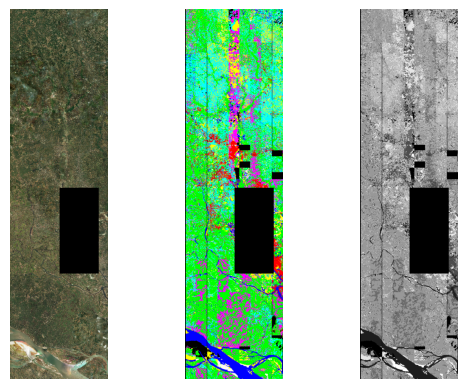

In [19]:
fig, ax = plt.subplots(1,3, dpi=100)

ax[0].imshow(in_array)
ax[0].axis('off')
ax[1].imshow(gt_array)
ax[1].axis('off')
ax[2].imshow(gt_array_bw, cmap='gray')
ax[2].axis('off')

### unique values

In [20]:
print(f"gt bw: {np.unique(gt_array_bw)}")
print(f"gt   :\n {np.unique(gt_array.reshape(-1, gt_array.shape[2]), axis=0)}")

gt bw: [  0  29  38  53  76 105 150 160 179 226 251]
gt   :
 [[  0   0   0]
 [  0   0 255]
 [  0 255   0]
 [  0 255 255]
 [128   0   0]
 [128   0 128]
 [160 160 164]
 [255   0   0]
 [255   0 255]
 [255 251 240]
 [255 255   0]]


### encode rgb mask to one channel 

[0 1 2 3 4 5]


(-0.5, 264.5, 999.5, -0.5)

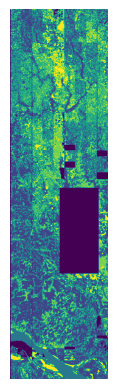

In [21]:
from utils.label import encode_bw_mask

encoded_mask = np.array(encode_bw_mask(Image.fromarray(gt_array)))
print(np.unique(encoded_mask))
plt.imshow(encoded_mask)
plt.axis('off')

### display all class labels

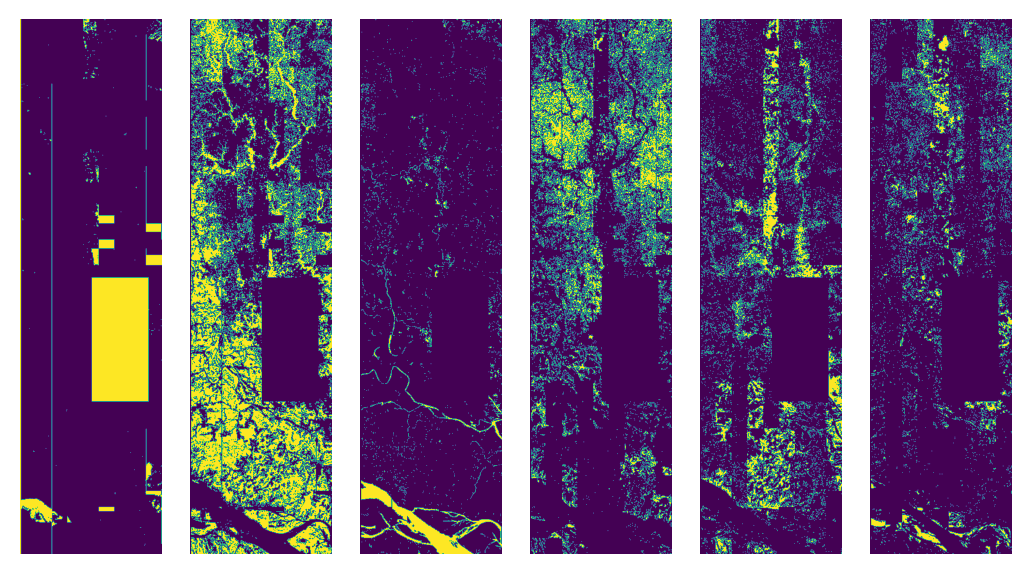

In [22]:
fig, ax = plt.subplots(1,6, dpi=200)

for i in range(6):
    ax[i].imshow(encoded_mask == i)
    ax[i].axis('off')

### display segmented image

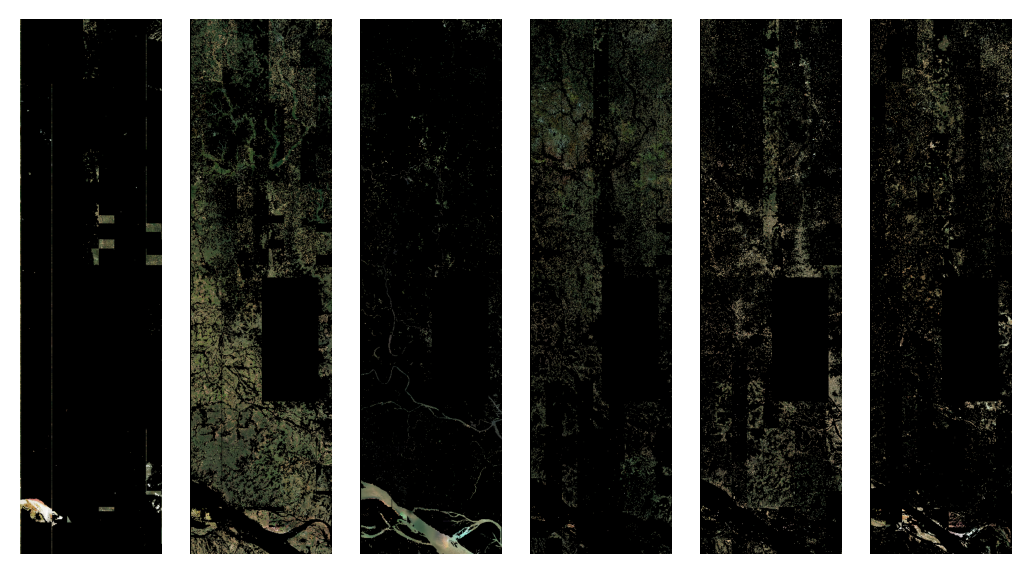

In [23]:
fig, ax = plt.subplots(1,6, dpi=200)
rgb_mask = np.zeros((encoded_mask.shape[0], encoded_mask.shape[1], 3), dtype=np.uint8)

for i in range(6):
    rgb_mask = np.stack([encoded_mask == i] * 3, axis=-1)
    ax[i].imshow(np.where(rgb_mask, in_array, 0))
    ax[i].axis('off')

### calculate total pixel for each class

<BarContainer object of 6 artists>

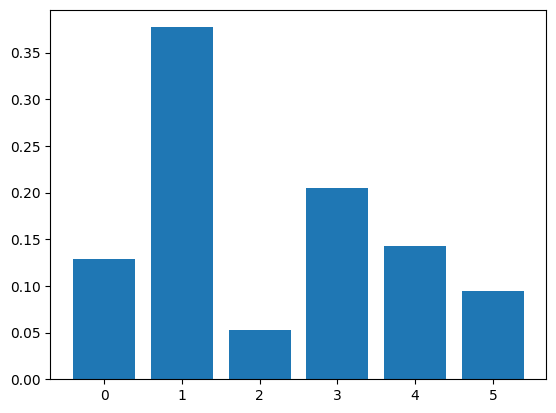

In [24]:
labels, counts = np.unique(encoded_mask, return_counts=True)
plt.bar(labels, counts/sum(counts))